## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
# study_results_df                             

# Combine the data into a single dataset
# merge_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="any")
# merge_df.head()

# Display the data table for preview


In [3]:
merge_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="inner")
merge_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice=merge_df["Mouse ID"].value_counts()
len(mice)

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = merge_df[merge_df.duplicated()]
duplicateRowsDF
# duplicateRowsDF = dfObj[dfObj.duplicated()]
# print("Duplicate Rows except first occurrence based on all columns are :")
# print(duplicateRowsDF)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Dup_mice=merge_df[merge_df('Mouse ID')==g989]


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = merge_df.drop_duplicates(subset=['Mouse ID'], keep="first")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [62]:
clean_df=merge_df.loc[merge_df["Mouse ID"]!="g989"]


In [63]:
# Checking the number of mice in the clean DataFrame.
mice=clean_df["Mouse ID"].value_counts()
len(mice)

248

## Summary Statistics

In [9]:
droppedf = df.drop(columns=['Sex','Mouse ID','Age_months','Weight (g)','Timepoint','Metastatic Sites'])
droppedf.head()



,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [141]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# xdf=merge_df.groupby["Tumor Volume (mm3)"].mean()("Drug Regimen")
# xdf
# ,'median','var','std','sem']})

Mouse_a=merge_df.groupby("Drug Regimen")
average=Mouse_a["Tumor Volume (mm3)"].mean()
median=Mouse_a["Tumor Volume (mm3)"].median()
variance=Mouse_a["Tumor Volume (mm3)"].var()
standard_deviation=Mouse_a["Tumor Volume (mm3)"].std()
SEM=Mouse_a["Tumor Volume (mm3)"].sem()
summary_df2=pd.DataFrame({"Mean":average,"median":median,"variance":variance,"standard_deviation":standard_deviation,"SEM":SEM})
summary_df2
# # count=grouped_df["Item Name"].count()

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,SEM,median,standard_deviation,variance
Drug Regimen,,,,,
Capomulin,40.675741,0.329346,41.557809,4.994774,24.947764
Ceftamin,52.591172,0.469821,51.776157,6.268188,39.290177
Infubinol,52.884795,0.492236,51.820584,6.567243,43.128684
Ketapril,55.235638,0.603860,53.698743,8.279709,68.553577
Naftisol,54.331565,0.596466,52.509285,8.134708,66.173479
Placebo,54.033581,0.581331,52.288934,7.821003,61.168083
Propriva,52.322552,0.512884,50.854632,6.507770,42.351070
Ramicane,40.216745,0.320955,40.673236,4.846308,23.486704
Stelasyn,54.233149,0.573111,52.431737,7.710419,59.450562


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_df=merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [64]:

Mouse_1=merge_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
Mouse_1

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<function matplotlib.pyplot.show>

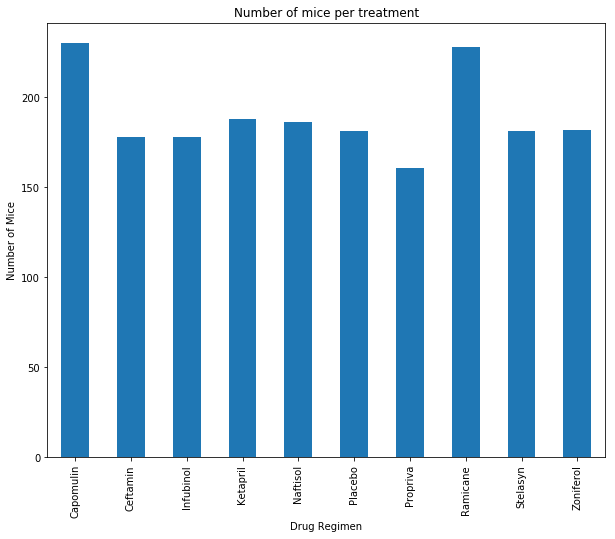

In [65]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# users = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
# x_axis = np.arange(len(mice)
                   
plot_pandas=Mouse_1.plot(kind="bar",figsize =(10,8))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of mice per treatment")
plt.show

<BarContainer object of 10 artists>

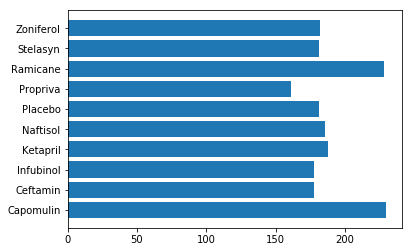

In [68]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# plot_matplot=Mouse_1.plot.bar(figsize =(10,8))
# plt.xlabel("Drug Regimen")
# # plt.ylabel("Number of Mice")
# plt.title("Number of mice per treatment")
# plt.show
index =Mouse_1.index
plt.barh(index,Mouse_1)

<function matplotlib.pyplot.show>

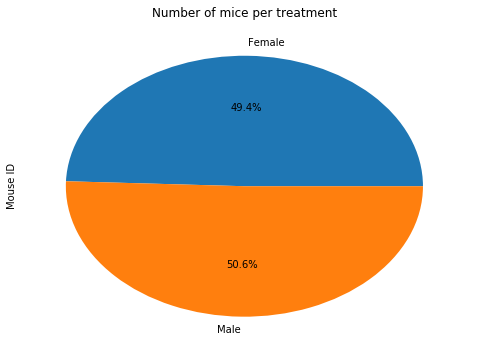

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot_panda=Mouse_2.plot(kind="pie",figsize =(8,6),autopct='%1.1f%%')
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Mice")
plt.title("Number of mice per treatment")
plt.show


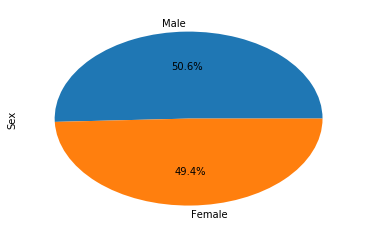

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


Mouse_2=merge_df["Sex"].value_counts()
# plot_matplot=Mouse_2.plot.pie(figsize =(8,6),autopct='%1.1f%%')
# index =Mouse_2.index
plt.pie(Mouse_2.values,labels=Mouse_2.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Drug_Regimens =["Capomulin","Ramicane","Infubinol","Ceftamin"]
# create a DF having all drugs from drug regimen
four_regimendf=merge_df.loc[merge_df['Drug Regimen'].isin(Drug_Regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df=four_regimendf.groupby("Mouse ID").max()["Timepoint"]

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df=pd.merge(last_timepoint_df,four_regimendf, on="Mouse ID", how = "inner")
final_df.head()
        

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1


In [111]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in Drug_Regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    moused=final_df.loc[final_df['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    tumor_vol_data.append(moused)
    # add subset
    # Determine outliers using upper and lower bounds
    quartiles = moused.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    Outliers=moused.loc[(moused< lower_bound) | (moused>upper_bound)]
    print(drug,Outliers)
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")




('Capomulin', 601    25.472143
602    23.343598
Name: Tumor Volume (mm3), dtype: float64)
('Ramicane', 354    22.050126
Name: Tumor Volume (mm3), dtype: float64)
('Infubinol', Series([], Name: Tumor Volume (mm3), dtype: float64))
('Ceftamin', Series([], Name: Tumor Volume (mm3), dtype: float64))


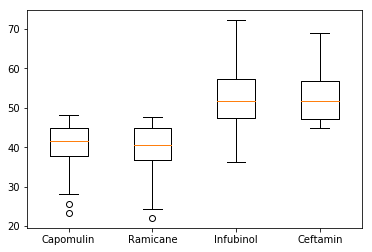

In [114]:
# plt.subplots(figsize=(12,7))
# ax1.set_title('Final tumor volume per regimen')
# ax1.set_ylabel('Tumor Volume (mm3)')
# ax1.set_xlabel('Drug Regimen')
# ax1.boxplot
# plt.show()
plt.boxplot(tumor_vol_data, labels=Drug_Regimens);


In [56]:
# df3=merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin',['Tumor Volume (mm3)']]

# # merge_df.loc[merge_df['Drug Regimen'] == 'Ramicane',['Tumor Volume (mm3)']]
# # merge_df.loc[merge_df['Drug Regimen'] == 'Infubinol',['Tumor Volume (mm3)']]
# # merge_df.loc[merge_df['Drug Regimen'] == 'Ceftamin',['Tumor Volume (mm3)']]

# details=pd.DataFrame(columns = ('Tumor Volume (mm3)'),index=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# tumor_vol_data =[]


# # Put treatments into a list for for loop (and later for plot labels)

# # result=merge_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
# # result
# # Create empty list to fill with tumor vol data (for plotting)
# # "?"

# # # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# # print(f"{Tumor Volume (mm3)} IQR data is:")
# # print(f"The lower quartile of {Tumor Volume (mm3)} is: {lowerq}")
# # print(f"The upper quartile of {Tumor Volume (mm3)} is: {upperq}")
# # print(f"The interquartile range of {Tumor Volume (mm3)} is: {iqr}")
# # print(f"The the median of {Tumor Volume (mm3)} is: {quartiles[0.5]} ")
# # 
    
# #     # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
#     # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Tumor Volume (mm3)
10,45.000000
11,43.878496
12,37.614948
13,38.177232
14,36.866876
15,33.949940
16,32.959671
17,28.328531
18,25.472143
19,23.343598


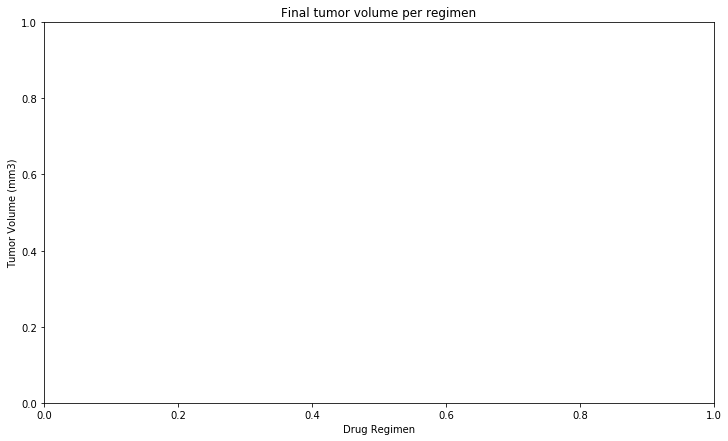

In [112]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Drug Regimens = ["Capomulin", "Ramicane", "Infubinol", and "Ceftamin"]


# If the data is in a dataframe, we use pandas to give quartile calculations


## Line and Scatter Plots

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df=merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


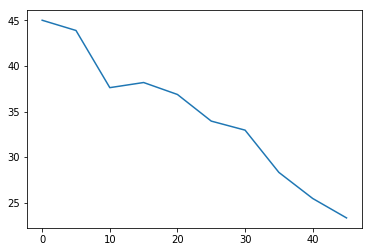

In [117]:
Line_plot=line_df.loc[line_df["Mouse ID"]=='s185']
plt.plot(Line_plot["Timepoint"] , Line_plot['Tumor Volume (mm3)'])


## Correlation and Regression

r square is :0.7088568047708721
correlation is :0.841936342469472


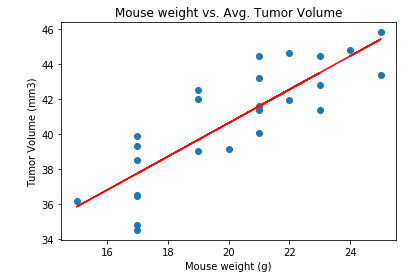

In [134]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_3['Weight (g)']
y_values = cap_3['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight vs. Avg. Tumor Volume")
r_squared = rvalue**2
print("r square is :" +str(r_squared))
print ("correlation is :" +str(rvalue))
plt.show()